In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
url_cus = "/content/drive/MyDrive/Case Study Data Scientist/Case Study - Customer.csv"
url_pro = "/content/drive/MyDrive/Case Study Data Scientist/Case Study - Product.csv"
url_stro = "/content/drive/MyDrive/Case Study Data Scientist/Case Study - Store.csv"
url_tra = "/content/drive/MyDrive/Case Study Data Scientist/Case Study - Transaction.csv"

In [ ]:
df_c = pd.read_csv(url_cus, sep= ';')
df_p = pd.read_csv(url_pro, sep= ';')
df_s = pd.read_csv(url_stro, sep= ';')
df_t = pd.read_csv(url_tra, sep= ';')

In [ ]:
df1 = pd.merge(df_t, df_c, on='CustomerID', how='inner')
df2 = pd.merge(df1, df_s, on = 'StoreID', how = 'inner')
df = pd.merge(df2, df_p, on = 'ProductID', how = 'inner')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
 18  Price_y 

# Membuat data baru untuk clustering

In [ ]:
# Lakukan aggregasi menggunakan groupby
aggregated_df = df.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Menghitung jumlah TransactionID
    'Qty': 'sum',               # Menghitung total Qty
    'TotalAmount': 'sum'              # Menghitung total Price
})

In [ ]:
# Ubah nama kolom hasil aggregasi
aggregated_df.rename(columns={
    'TransactionID': 'TransactionCount',
    'Qty': 'TotalQty',
    'TotalAmount': 'TotalAmount'
})
# Tampilkan hasil aggregasi
df_agg = aggregated_df.reset_index()
df_agg.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     447 non-null    int64
 1   TransactionID  447 non-null    int64
 2   Qty            447 non-null    int64
 3   TotalAmount    447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


# Data preprocesing

## cek outlier

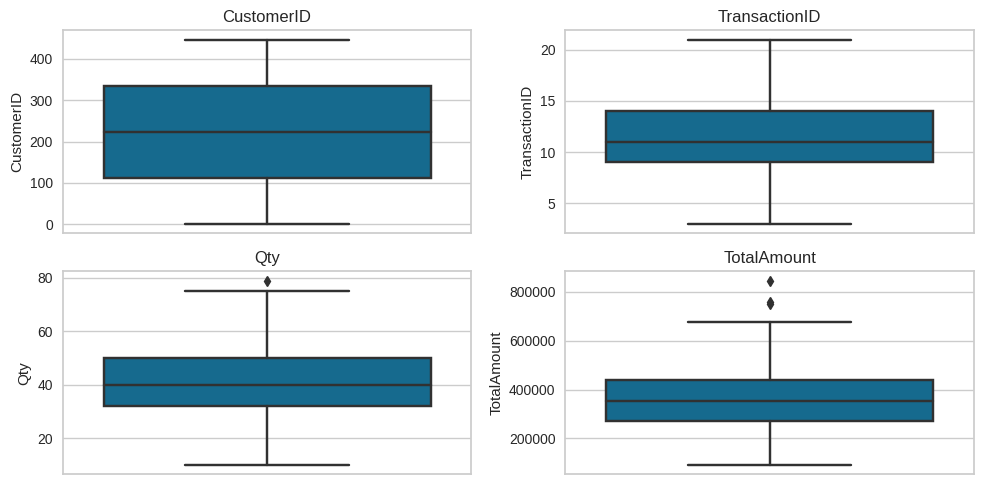

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(0, len(df_agg.columns)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_agg.iloc[:, i], orient='v')
    plt.title(df_agg.columns[i])
    plt.tight_layout()

plt.show()

## cek distribusi data

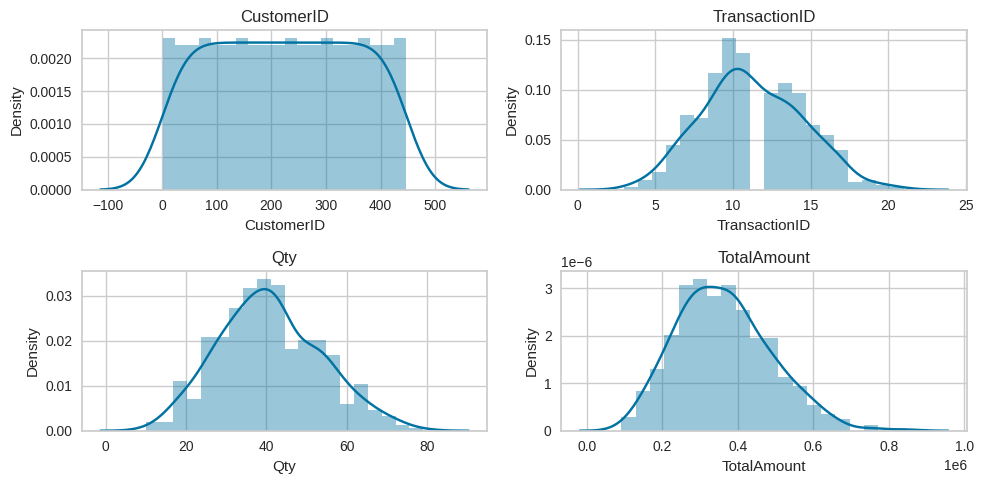

In [ ]:
#data distribution
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize=(10, 5))
for i in range(len(df_agg.columns)):
    plt.subplot(2, 2, i + 1)
    sns.distplot(df_agg.iloc[:, i], bins=20)
    plt.title(df_agg.columns[i])
    plt.tight_layout()

plt.show()

hapus outlier

In [ ]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_agg)}')

filtered_entries = np.array([True] * len(df_agg))

for col in (df_agg.columns):
    zscore = abs(stats.zscore(df_agg[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_agg = df_agg[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_agg)}')

Jumlah baris sebelum memfilter outlier: 447
Jumlah baris setelah memfilter outlier: 443


In [ ]:
# cek data setelah remove outlier
df_agg.shape

(443, 4)

##standarisasi

In [ ]:
#buang kolo customerID karea tidak dipakai terlebih dahulu
df_agg.drop(columns='CustomerID',inplace=True)

<ipython-input-113-ecc0b122c3fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg.drop(columns='CustomerID',inplace=True)


In [ ]:
df_agg.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [ ]:
from sklearn.preprocessing import StandardScaler
feature = ['TransactionID','Qty','TotalAmount']
scaler = StandardScaler()
df_agg = scaler.fit_transform(df_agg)
new_df = df_agg
new_df = pd.DataFrame(df_agg, columns=feature)
new_df.head()

,TransactionID,Qty,TotalAmount
0,1.859034,1.554275,2.209795
1,0.587630,1.313244,0.277360
2,1.223332,1.232901,0.728261
3,-0.365923,0.429466,-0.473864
4,-1.319477,-1.097060,-0.757455


#clustering K-means
## mencari jumlah cluster yang tepat

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

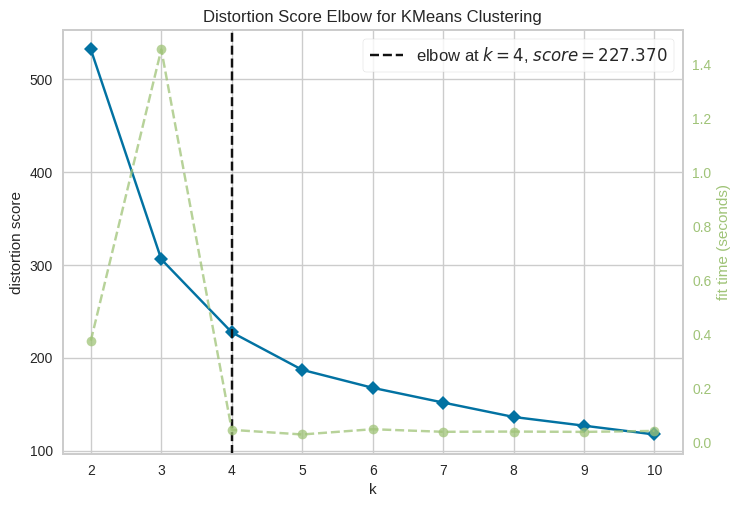

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# menyimbunyikan warning
warnings.filterwarnings("ignore", category=FutureWarning, message="The default value of `n_init` will change from 10 to 'auto' in 1.4.")
# Membuat model KMeans
model = KMeans()
# Menampilkan visualisasi Elbow Method
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(new_df)
visualizer.show()

hasil di peroleh ada 4 cluster segementasi

##clustering menggunakan K-means

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [ ]:
new_df['km_labels']=kmeans.labels_

In [ ]:
new_df.head()

,TransactionID,Qty,TotalAmount,km_labels
0,1.859034,1.554275,2.209795,2
1,0.587630,1.313244,0.277360,1
2,1.223332,1.232901,0.728261,2
3,-0.365923,0.429466,-0.473864,3
4,-1.319477,-1.097060,-0.757455,0


<Figure size 600x400 with 0 Axes>

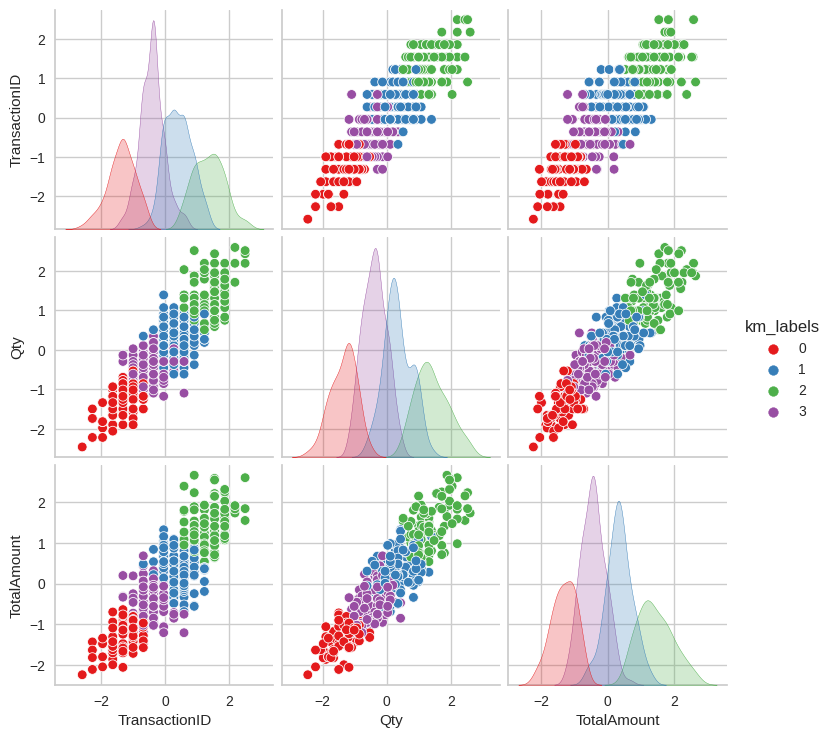

In [ ]:
plt.figure(figsize=(6,4))
sns.pairplot(data=new_df,hue='km_labels',palette='Set1')
plt.show()

## evaluasi silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score #library
print('nilai silhouettescore : ')
silhouette_score(new_df, kmeans.labels_)

nilai silhouettescore : 


0.613177607682284

**Nilai silhouette score sebesar 0.613177607682284 mengindikasikan bahwa clustering yang dilakukan memiliki hasil yang relatif baik. Rentang nilai silhouette score berkisar dari -1 hingga 1. Semakin dekat nilai silhouette score dengan 1, semakin baik kualitas clusteringnya. Dalam hal ini, nilai silhouette score yang mendekati 1 menunjukkan bahwa objek dalam cluster memiliki jarak yang lebih dekat dengan objek dalam cluster yang sama dibandingkan dengan objek dalam cluster lain. Ini mengindikasikan bahwa pengelompokan objek dalam cluster sangat baik**

## sumary data

In [ ]:
df_clas = aggregated_df.reset_index()
df_clas.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
# remove outlier untuk menyamakan panjang data
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clas)}')

filtered_entries = np.array([True] * len(df_clas))

for col in (df_clas.columns):
    zscore = abs(stats.zscore(df_clas[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_clas = df_clas[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_clas)}')

Jumlah baris sebelum memfilter outlier: 447
Jumlah baris setelah memfilter outlier: 443


In [ ]:
# cek ukuran data
df_clas.shape

(443, 4)

In [ ]:
df_clas['km_labels']=kmeans.labels_
df_clas.head()

<ipython-input-126-8f5c6e9bc8bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clas['km_labels']=kmeans.labels_


,CustomerID,TransactionID,Qty,TotalAmount,km_labels
0,1,17,60,623300,2
1,2,13,57,392300,1
2,3,15,56,446200,2
3,4,10,46,302500,3
4,5,7,27,268600,0


In [ ]:
df_agg_clus = df_clas.groupby('km_labels').agg({'CustomerID':'count',
                                                'TransactionID':'count',
                                                'Qty':'mean',
                                                'TotalAmount':'mean'}).reset_index()
# Ubah nama kolom hasil aggregasi
df_agg_clus=df_agg_clus.rename(columns={
    'CustomerID' : 'Total_Customer',
    'TransactionID': 'Total_Transaction',
    'Qty': 'TotalQty'
})
round(df_agg_clus,1)

,km_labels,Total_Customer,Total_Transaction,TotalQty,TotalAmount
0,0,83,83,23.8,201980.7
1,1,127,127,44.8,399892.9
2,2,89,89,58.2,531419.1
3,3,144,144,35.8,307320.1


Tabel tabel_c yang Anda berikan berisi statistik rata-rata untuk setiap atribut dalam masing-masing cluster. Mari kita lakukan analisis, interpretasi, dan memberikan rekomendasi bisnis untuk setiap cluster:

1. Analisis:
   - Cluster 0: Cluster ini memiliki rata-rata Total_Customer sekitar 83, Total_Transaction sekitar 83, TotalQty sekitar 23.8, dan TotalAmount sekitar 201980.7. Cluster ini mungkin termasuk pelanggan dengan volume transaksi rendah tetapi kontribusi TotalAmount yang cukup signifikan.
   - Cluster 1: Cluster ini memiliki rata-rata Total_Customer sekitar 127, Total_Transaction sekitar 127, TotalQty sekitar 44.8, dan TotalAmount sekitar 399892.9. Cluster ini mungkin termasuk pelanggan dengan volume transaksi dan kontribusi TotalAmount yang lebih tinggi.
   - Cluster 2: Cluster ini memiliki rata-rata Total_Customer sekitar 89, Total_Transaction sekitar 89, TotalQty sekitar 58.2, dan TotalAmount sekitar 531419.1. Cluster ini mungkin termasuk pelanggan dengan volume transaksi tinggi dan kontribusi TotalAmount yang signifikan.
   - Cluster 3: Cluster ini memiliki rata-rata Total_Customer sekitar 144, Total_Transaction sekitar 144, TotalQty sekitar 35.8, dan TotalAmount sekitar 307320.1. Cluster ini mungkin termasuk pelanggan dengan volume transaksi sedang dan kontribusi TotalAmount yang lumayan.

2. Interpretasi:
   - Cluster 0: Pelanggan dalam cluster ini cenderung memiliki frekuensi dan nilai transaksi yang rendah, tetapi masih memberikan kontribusi yang berarti terhadap TotalAmount.
   - Cluster 1: Pelanggan dalam cluster ini memiliki frekuensi dan nilai transaksi yang tinggi, serta memberikan kontribusi signifikan terhadap TotalAmount.
   - Cluster 2: Pelanggan dalam cluster ini adalah pelanggan dengan frekuensi dan nilai transaksi yang sangat tinggi, dan memberikan kontribusi besar terhadap TotalAmount.
   - Cluster 3: Pelanggan dalam cluster ini memiliki frekuensi transaksi sedang dengan kontribusi TotalAmount yang cukup baik.

3. Rekomendasi Bisnis:
   - Cluster 0: Fokus pada strategi retensi pelanggan untuk meningkatkan frekuensi transaksi dan nilai transaksi mereka.
   - Cluster 1: Tingkatkan layanan pelanggan dan tawarkan insentif untuk mendorong pelanggan dalam cluster ini untuk melakukan lebih banyak transaksi.
   - Cluster 2: Pertahankan kualitas layanan dan tawarkan insentif khusus untuk meningkatkan loyalitas pelanggan dalam cluster ini.
   - Cluster 3: Tingkatkan nilai transaksi pelanggan dalam cluster ini dengan menghadirkan penawaran produk atau layanan yang relevan.